# Import Libraries

In [35]:
# basic imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

# ML libraries
from sklearn.model_selection import train_test_split

# remove warnings
import warnings
warnings.filterwarnings("ignore")

# Sample Data

In [36]:
# # Generate mock customer data
# np.random.seed(42)
# num_customers = 2000

# data = {
#     'CustomerID': [f'CUST{1000+i}' for i in range(num_customers)],
#     'Gender': np.random.choice(['Male', 'Female'], num_customers, p=[0.5, 0.5]),
#     'SeniorCitizen': np.random.choice([0, 1], num_customers, p=[0.84, 0.16]),
#     'Partner': np.random.choice(['Yes', 'No'], num_customers, p=[0.48, 0.52]),
#     'Dependents': np.random.choice(['Yes', 'No'], num_customers, p=[0.3, 0.7]),
#     'Tenure': np.random.randint(1, 73, num_customers), # Months
#     'PhoneService': np.random.choice(['Yes', 'No'], num_customers, p=[0.9, 0.1]),
#     'MultipleLines': np.random.choice(['Yes', 'No', 'No phone service'], num_customers, p=[0.42, 0.48, 0.1]),
#     'InternetService': np.random.choice(['DSL', 'Fiber optic', 'No'], num_customers, p=[0.34, 0.44, 0.22]),
#     'OnlineSecurity': np.random.choice(['Yes', 'No', 'No internet service'], num_customers, p=[0.28, 0.50, 0.22]),
#     'OnlineBackup': np.random.choice(['Yes', 'No', 'No internet service'], num_customers, p=[0.34, 0.44, 0.22]),
#     'DeviceProtection': np.random.choice(['Yes', 'No', 'No internet service'], num_customers, p=[0.34, 0.44, 0.22]),
#     'TechSupport': np.random.choice(['Yes', 'No', 'No internet service'], num_customers, p=[0.29, 0.49, 0.22]),
#     'StreamingTV': np.random.choice(['Yes', 'No', 'No internet service'], num_customers, p=[0.38, 0.40, 0.22]),
#     'StreamingMovies': np.random.choice(['Yes', 'No', 'No internet service'], num_customers, p=[0.39, 0.39, 0.22]),
#     'Contract': np.random.choice(['Month-to-month', 'One year', 'Two year'], num_customers, p=[0.55, 0.24, 0.21]),
#     'PaperlessBilling': np.random.choice(['Yes', 'No'], num_customers, p=[0.59, 0.41]),
#     'PaymentMethod': np.random.choice(['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)'], num_customers, p=[0.34, 0.23, 0.22, 0.21]),
#     'MonthlyCharges': np.random.normal(loc=65, scale=30, size=num_customers).clip(18, 120).round(2),
# }

# # create DataFrame
# df_customers = pd.DataFrame(data)

# # Generate TotalCharges based on Tenure and MonthlyCharges with some noise
# df_customers['TotalCharges'] = (df_customers['Tenure'] * df_customers['MonthlyCharges'] * np.random.uniform(0.95, 1.05, num_customers)).round(2)

# # Make some TotalCharges empty for realism (e.g., new customers with 0 tenure)
# df_customers.loc[df_customers['Tenure'] == 1, 'TotalCharges'] = df_customers['MonthlyCharges']

# # Get all customers with Tenure < 3
# low_tenure_mask = df_customers['Tenure'] < 3
# # Get random sample of 1% of those low-tenure customers
# random_indices = df_customers[low_tenure_mask].sample(frac=0.01, random_state=42).index
# # Set TotalCharges to NaN for these
# df_customers.loc[random_indices, 'TotalCharges'] = np.nan

# # Simulate Churn (more likely for month-to-month, higher charges, lower tenure)
# churn_probability = 0.1 \
# + 0.15 * (df_customers['Contract'] == 'Month-to-month') \
# + 0.1 * (df_customers['InternetService'] == 'Fiber optic') \
# + 0.001 * (df_customers['MonthlyCharges'] - 65) \
# - 0.002 * (df_customers['Tenure'] - 36) \
# + 0.1 * (df_customers['OnlineSecurity'] == 'No') \
# + 0.1 * (df_customers['TechSupport'] == 'No')

# churn_probability = np.clip(churn_probability, 0.01, 0.99)
# df_customers['Churn'] = np.random.binomial(1, churn_probability, num_customers).astype(str)
# df_customers['Churn'] = df_customers['Churn'].replace({'1': 'Yes', '0': 'No'})

# # Replace 'No phone service' and 'No internet service' for consistency
# for col in ['MultipleLines']:
#     df_customers[col] = df_customers.apply(lambda row: 'No' if row['PhoneService'] == 'No' else row[col], axis=1)

# for col in ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']:
#     df_customers[col] = df_customers.apply(lambda row: 'No' if row['InternetService'] == 'No' else row[col], axis=1)

# # make folder if it doesn't exist
# if not os.path.exists('Data'):
#     os.makedirs('Data')

# # Save the DataFrame to an Excel file
# df_customers.to_excel('./Data/telecom_churn_mock_data.xlsx', index=False)
# print("Mock telecom churn data generated: telecom_churn_mock_data.xlsx")


# Exploratory Data Analysis

## Explore Data

In [37]:
# load the data
df = pd.read_excel('./Data/telecom_churn_mock_data.xlsx')

print("Data loaded successfully")

Data loaded successfully


In [38]:
# show all columns
pd.set_option('display.max_columns', None)

# data preview
df.head()

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,CUST1000,Male,0,No,No,30,Yes,Yes,No,No,No,No,No,No,No,Month-to-month,No,Bank transfer (automatic),69.55,2047.01,Yes
1,CUST1001,Female,0,No,Yes,11,Yes,Yes,Fiber optic,No internet service,No internet service,No,No internet service,No,No internet service,Month-to-month,Yes,Electronic check,48.08,522.42,Yes
2,CUST1002,Female,1,No,No,17,No,No,Fiber optic,No,Yes,No,No,Yes,No,Two year,No,Electronic check,36.56,610.07,No
3,CUST1003,Female,0,Yes,No,26,Yes,No,No,No,No,No,No,No,No,One year,Yes,Bank transfer (automatic),79.72,2159.26,No
4,CUST1004,Male,0,Yes,Yes,23,Yes,No,Fiber optic,No internet service,No,No,Yes,No,Yes,Month-to-month,Yes,Mailed check,70.42,1672.56,Yes


In [39]:
# shape of data
print(f'Rows = {df.shape[0]}')
print(f'Columns = {df.shape[1]}')

Rows = 2000
Columns = 21


In [40]:
# data info
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        2000 non-null   object 
 1   Gender            2000 non-null   object 
 2   SeniorCitizen     2000 non-null   int64  
 3   Partner           2000 non-null   object 
 4   Dependents        2000 non-null   object 
 5   Tenure            2000 non-null   int64  
 6   PhoneService      2000 non-null   object 
 7   MultipleLines     2000 non-null   object 
 8   InternetService   2000 non-null   object 
 9   OnlineSecurity    2000 non-null   object 
 10  OnlineBackup      2000 non-null   object 
 11  DeviceProtection  2000 non-null   object 
 12  TechSupport       2000 non-null   object 
 13  StreamingTV       2000 non-null   object 
 14  StreamingMovies   2000 non-null   object 
 15  Contract          2000 non-null   object 
 16  PaperlessBilling  2000 non-null   object 


### Observation
- Data needs some type conversion like object to category for memory effecient

In [41]:
# summary statistics
df.describe()

,SeniorCitizen,Tenure,MonthlyCharges,TotalCharges
count,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.151500,36.342500,65.880710,2394.132725
std,0.358625,21.029392,27.154716,1807.861046
min,0.000000,1.000000,18.000000,18.000000
25%,0.000000,18.000000,45.342500,934.712500
50%,0.000000,37.000000,65.460000,1972.770000
75%,0.000000,54.000000,84.992500,3532.675000
max,1.000000,72.000000,120.000000,8756.020000


In [42]:
# column names
df.columns

Index(['CustomerID', 'Gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'Tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

## Duplicate Rows

In [43]:
# get count of duplicate rows
print(f'Number of duplicate rows: {df.duplicated().sum()}')

# display duplicate rows if any exist
if df.duplicated().sum() > 0:
    print("\nDuplicate rows:")
    print(df[df.duplicated()])


Number of duplicate rows: 0


## Missing Values

In [44]:
# check missing values
missing_values = df.isnull().sum()
missing_percentages = (missing_values / len(df)) * 100

# create a summary DataFrame
missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Missing Percentage': missing_percentages.round(2)
})

# display only columns with missing values
print("Columns with missing values:")
print(missing_data[missing_data['Missing Values'] > 0])

# if no missing values, print a message
if missing_data['Missing Values'].sum() == 0:
    print("\nNo missing values found in the dataset.")

Columns with missing values:
Empty DataFrame
Columns: [Missing Values, Missing Percentage]
Index: []

No missing values found in the dataset.


## Type Casting

In [45]:
# Get memory usage for each column
memory_usage = df.memory_usage(deep=True).sum() / 1024  # Convert bytes to KB

print(f"Total memory usage before type conversion: '{memory_usage:.2f}' KB")

Total memory usage before type conversion: '2144.06' KB


In [46]:
# datatype before type casting
df.dtypes

CustomerID           object
Gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
Tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [47]:
# Convert object columns to category
object_columns = df.select_dtypes(include=['object']).columns
for col in object_columns:
    df[col] = df[col].astype('category')

# Convert float columns to int where appropriate    
df['MonthlyCharges'] = df['MonthlyCharges'].astype('int64')
df['TotalCharges'] = df['TotalCharges'].astype('int64')

# check datatype
df.dtypes

CustomerID          category
Gender              category
SeniorCitizen          int64
Partner             category
Dependents          category
Tenure                 int64
PhoneService        category
MultipleLines       category
InternetService     category
OnlineSecurity      category
OnlineBackup        category
DeviceProtection    category
TechSupport         category
StreamingTV         category
StreamingMovies     category
Contract            category
PaperlessBilling    category
PaymentMethod       category
MonthlyCharges         int64
TotalCharges           int64
Churn               category
dtype: object

In [48]:
# Get memory usage for each column
memory_usage = df.memory_usage(deep=True).sum() / 1024  # Convert bytes to KB

print(f"Total memory usage after type conversion: '{memory_usage:.2f}' KB")


Total memory usage after type conversion: '293.73' KB


### **When to use Category**
Use the category dtype in pandas when a column contains repeated string values with a limited number of unique entries (i.e., low cardinality), such as Gender, PhoneService, MultipleLines, or InternetService. This is because category stores the data more efficiently by assigning integer codes to each unique value and referencing them via a lookup table, which significantly reduces memory usage and can speed up operations like filtering, grouping, and sorting. However, avoid using category for columns with mostly unique values—such as names, emails, or user IDs—because the categorical structure adds overhead without providing memory savings or performance improvements. In such cases, keeping the column as object is more practical and flexible

## Outlier Detection

In [49]:
# Function to find outliers using IQR method
def find_iqr_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return series[(series < lower_bound) | (series > upper_bound)]

iqr_outliers_total = find_iqr_outliers(df['TotalCharges'])
iqr_outliers_monthly = find_iqr_outliers(df['MonthlyCharges'])
iqr_outliers_tenure = find_iqr_outliers(df['Tenure'])

print(f"Number of IQR outliers in 'TotalCharges': {len(iqr_outliers_total)}")
print(f"Number of IQR outliers in 'MonthlyCharges': {len(iqr_outliers_monthly)}")
print(f"Number of IQR outliers in 'Tenure': {len(iqr_outliers_tenure)}")

Number of IQR outliers in 'TotalCharges': 24
Number of IQR outliers in 'MonthlyCharges': 0
Number of IQR outliers in 'Tenure': 0


In [50]:
# Function to find outliers using Z-score method
def find_outliers_zscore(series, threshold=3):
    mean = series.mean()
    std_dev = series.std()
    z_scores = (series - mean) / std_dev
    return series[np.abs(z_scores) > threshold]

z_outliers_total = find_outliers_zscore(df['TotalCharges'])
z_outliers_monthly = find_outliers_zscore(df['MonthlyCharges'])
z_outliers_tenure = find_outliers_zscore(df['Tenure'])

print(f"Number of Z-score outliers in 'TotalCharges': {len(z_outliers_total)}")
print(f"Number of Z-score outliers in 'MonthlyCharges': {len(z_outliers_monthly)}")
print(f"Number of Z-score outliers in 'Tenure': {len(z_outliers_tenure)}")

Number of Z-score outliers in 'TotalCharges': 14
Number of Z-score outliers in 'MonthlyCharges': 0
Number of Z-score outliers in 'Tenure': 0


# Data Visualization

## Bar and Histogram plots of data

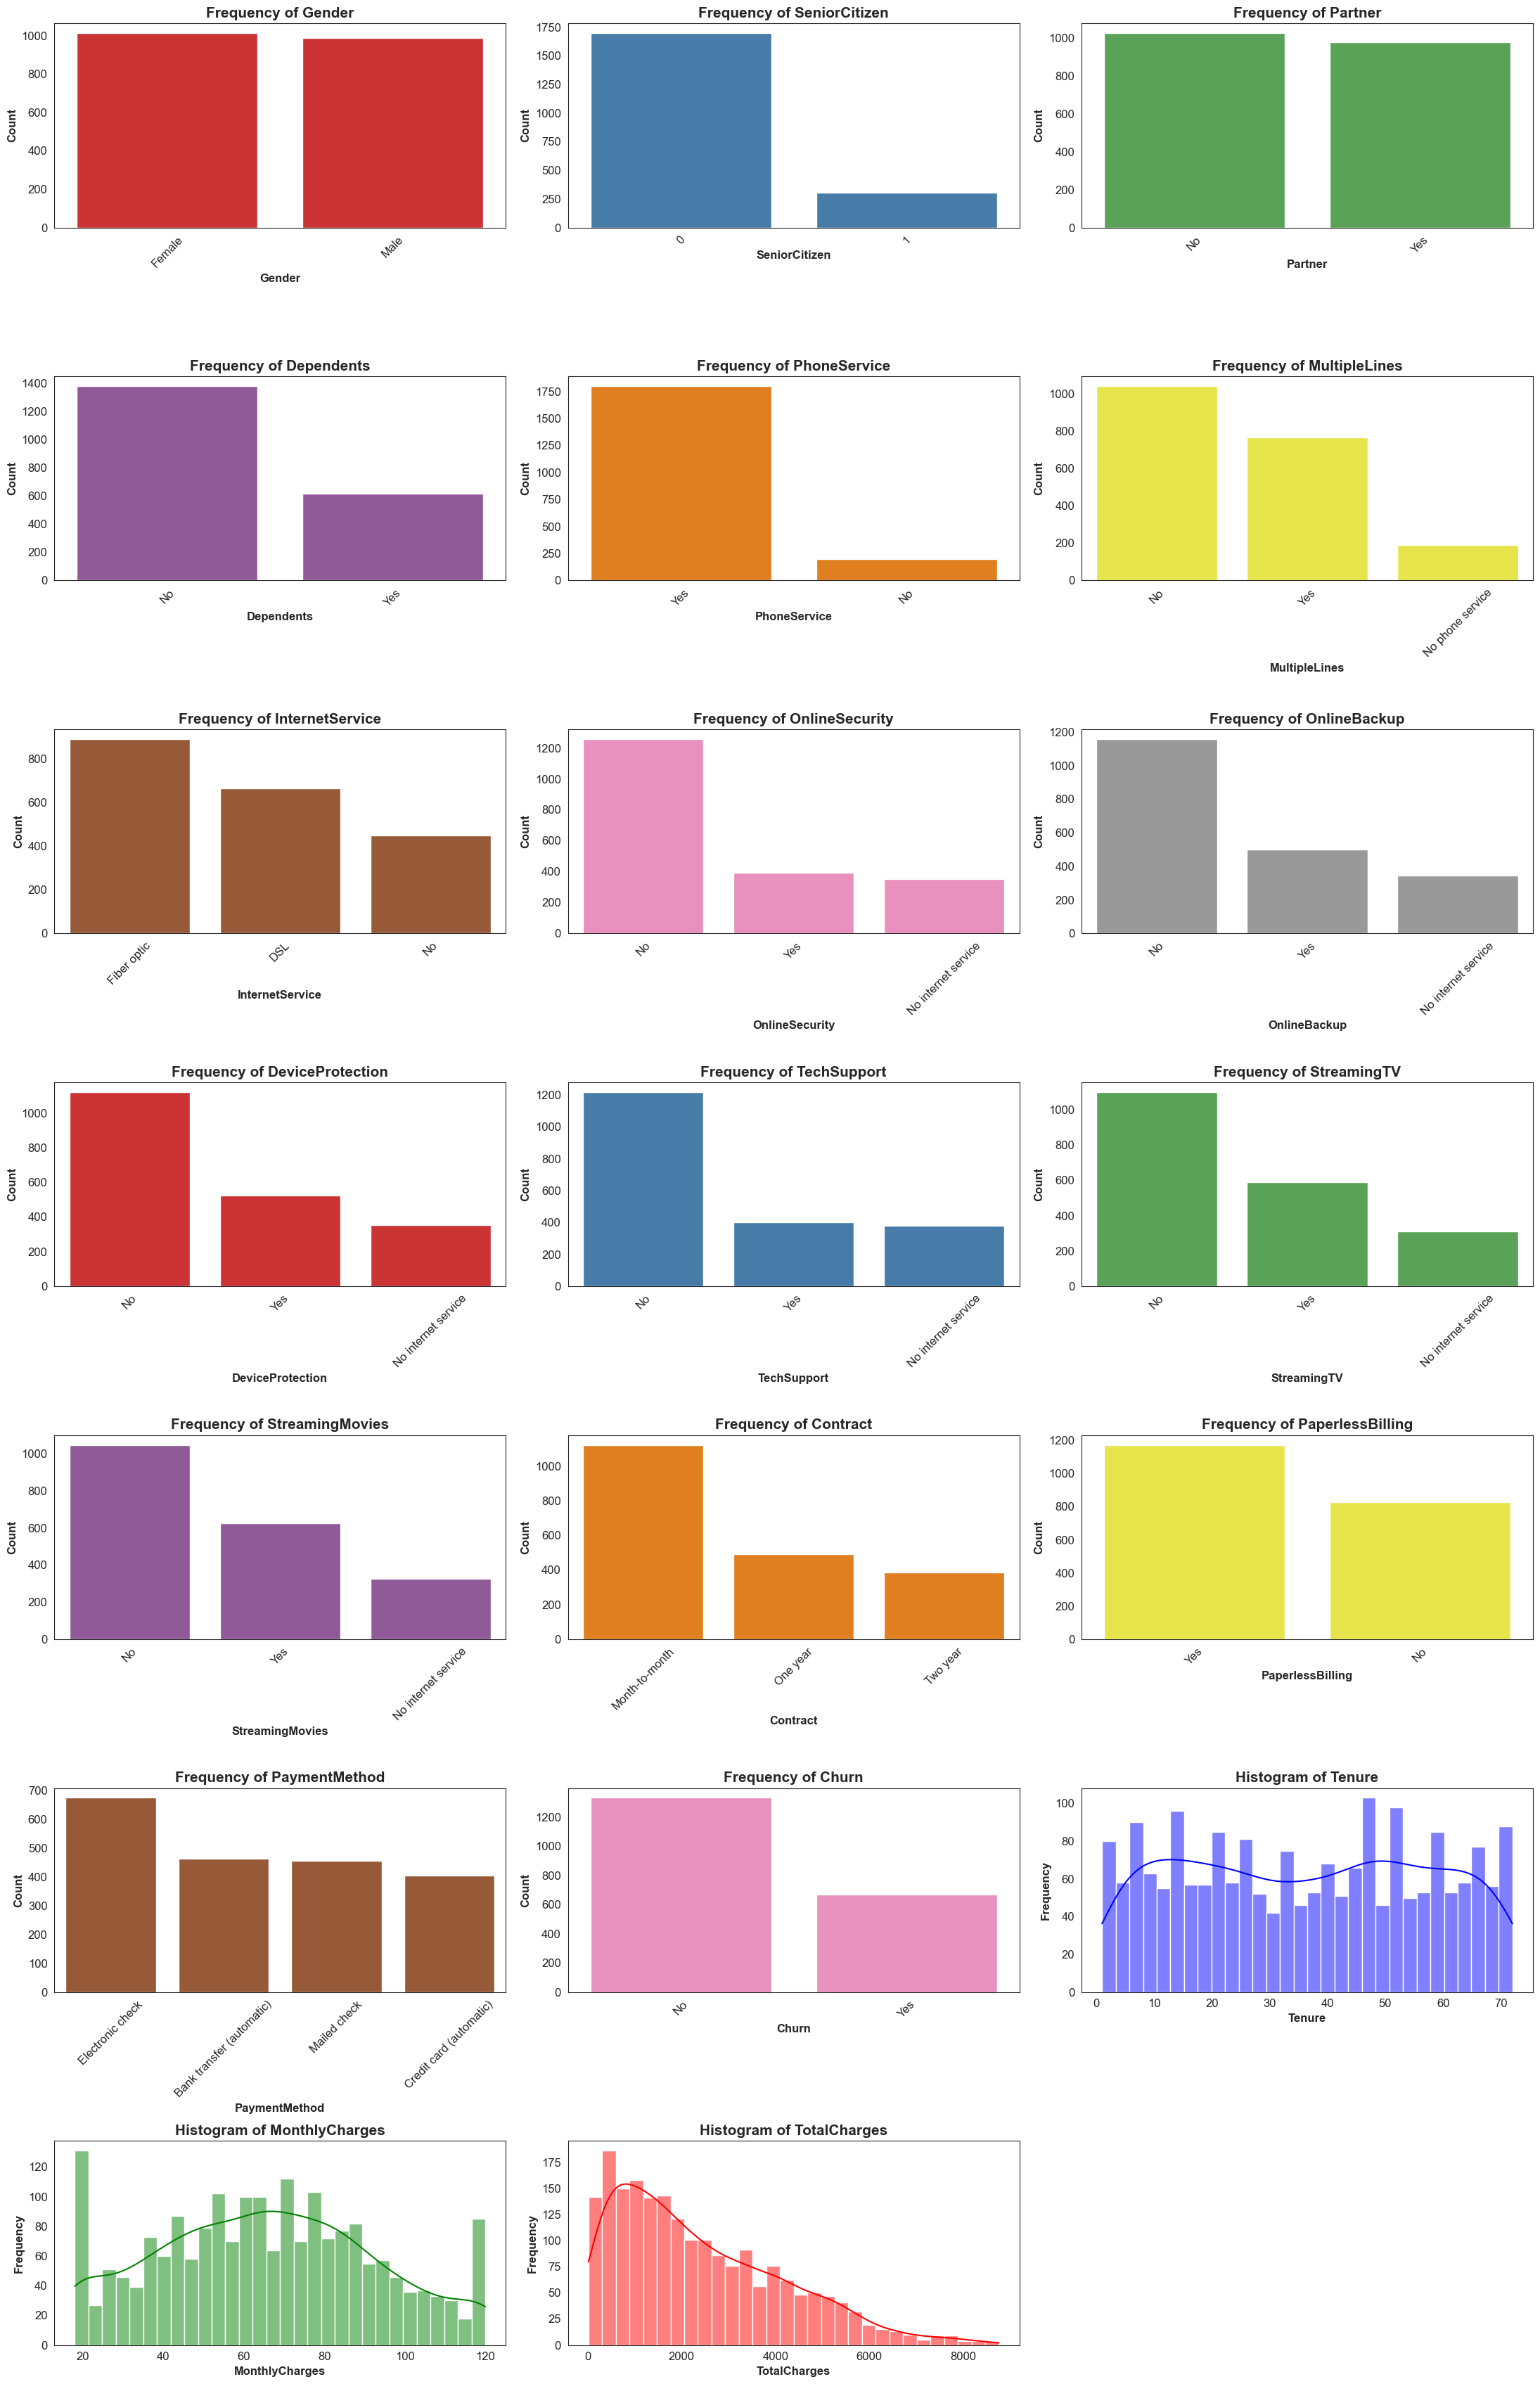

In [51]:
# Define column types
categorical_cols = ['Gender', 'SeniorCitizen', 'Partner', 'Dependents',
                    'PhoneService', 'MultipleLines', 'InternetService',
                    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                    'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
                    'PaymentMethod', 'Churn']

numeric_cols = ['Tenure', 'MonthlyCharges', 'TotalCharges']

# Set style without grid
sns.set_style("white")

# Define color palettes
category_colors = sns.color_palette("Set1", n_colors=len(categorical_cols))
numeric_colors = ["blue", "green", "red"]

# Plot setup
fig, axes = plt.subplots(nrows=7, ncols=3, figsize=(22, 34))
axes = axes.flatten()

# Plot categorical features
for i, col in enumerate(categorical_cols):
    sns.countplot(data=df, x=col, ax=axes[i], palette=[category_colors[i % len(category_colors)]],
                  order=df[col].value_counts().index)
    axes[i].set_title(f'Frequency of {col}', fontweight='bold', fontsize=15)
    axes[i].set_xlabel(col, fontweight='bold', fontsize=12)
    axes[i].set_ylabel('Count', fontweight='bold', fontsize=12)
    axes[i].tick_params(axis='x', labelrotation=45)
    axes[i].tick_params(axis='x', labelsize=12, width=1)
    axes[i].tick_params(axis='y', labelsize=12, width=1)

# Plot numeric features
for i, col in enumerate(numeric_cols):
    idx = len(categorical_cols) + i
    sns.histplot(df[col].dropna(), bins=30, kde=True, ax=axes[idx], color=numeric_colors[i])
    axes[idx].set_title(f'Histogram of {col}', fontweight='bold', fontsize=15)
    axes[idx].set_xlabel(col, fontweight='bold', fontsize=12)
    axes[idx].set_ylabel('Frequency', fontweight='bold', fontsize=12)
    axes[idx].tick_params(axis='x', labelsize=12, width=1)
    axes[idx].tick_params(axis='y', labelsize=12, width=1)

# Hide unused subplots
for j in range(len(categorical_cols) + len(numeric_cols), len(axes)):
    fig.delaxes(axes[j])

# Improve spacing
plt.subplots_adjust(hspace=0.6, wspace=0.3)
plt.tight_layout()
plt.show()


# Statistical Test on Numerical Columns

### Checking Normal Distribution Using Statistical Test
There are many tests to check data is normally distributed or not here is quick summay: 
- Use Shapiro-Wilk for smaller dataset
- Use D’Agostino & Pearson or KS test for larger samples
- Also plot a histogram and a Q-Q plot to visually confirm
  
`Data is small so i will use Shapiro-Wilk Test and for visually Q-Q Plot`


🔍 Checking Normality for: Tenure
Shapiro-Wilk Test:      Stat=0.95, p=0.00 → Not normal


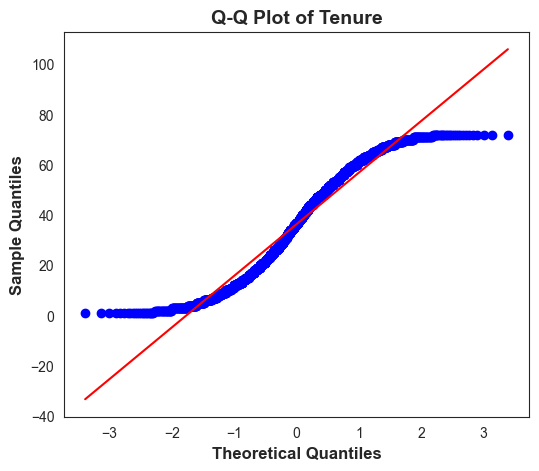


🔍 Checking Normality for: MonthlyCharges
Shapiro-Wilk Test:      Stat=0.98, p=0.00 → Not normal


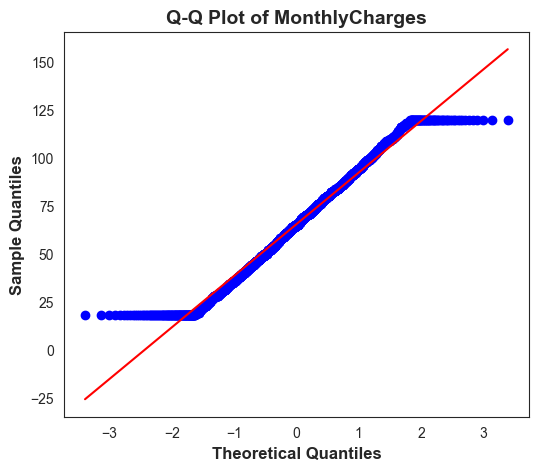


🔍 Checking Normality for: TotalCharges
Shapiro-Wilk Test:      Stat=0.93, p=0.00 → Not normal


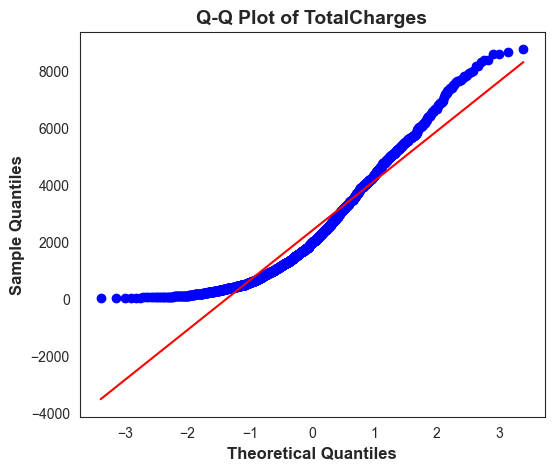

In [52]:
from scipy.stats import shapiro
import scipy.stats as stats
import matplotlib.pyplot as plt

def check_normality(series):
    print(f"\n🔍 Checking Normality for: {series.name}")

    # Shapiro-Wilk Test
    stat_sw, p_sw = shapiro(series)
    print(f"Shapiro-Wilk Test:      Stat={stat_sw:.2f}, p={p_sw:.2f} → {'Normal' if p_sw > 0.05 else 'Not normal'}")

    # Q-Q Plot
    plt.figure(figsize=(6, 5))
    stats.probplot(series, dist="norm", plot=plt)
    plt.title(f"Q-Q Plot of {series.name}", fontsize=14, fontweight='bold')
    plt.xlabel("Theoretical Quantiles", fontsize=12, fontweight='bold')
    plt.ylabel("Sample Quantiles", fontsize=12, fontweight='bold')
    plt.grid(False)
    plt.show()

check_normality(df['Tenure'])
check_normality(df['MonthlyCharges'])
check_normality(df['TotalCharges'])


### interpretation of Shapiro-Wilk Test:
  
- `p > 0.05 → normal`
- `p ≤ 0.05 → not normal`

### Interpretation of Q-Q Plot (Quantile-Quantile Plot):
- X-axis = Theoretical quantiles from a normal distribution
- Y-axis = Actual quantiles from your data


| What You See                   | What It Means                                 |
|--------------------------------|-----------------------------------------------|
| Points lie along the 45° line  | Data is approximately normally distributed    |
| Points form an S-shape         | Data may be skewed                            |
| Curved tails                   | Outliers or heavy-tailed distribution         |
| Deviations in center           | Data has non-normal central tendency          |


---

# Skewness and Kurtosis of Numerical columns

| Metric       | Meaning                                                  |
| ------------ | -------------------------------------------------------- |
| **Skewness** | Measures **asymmetry** of the distribution.              |
|              | > 0 = right-skewed (tail to the right)                   |
|              | < 0 = left-skewed (tail to the left)                     |
|              | ≈ 0 = symmetric                                          |
| **Kurtosis** | Measures **tailedness** or how extreme the outliers are. |
|              | > 0 = **Leptokurtic** (heavy tails, sharp peak)          |
|              | < 0 = **Platykurtic** (flat distribution, light tails)   |
|              | = 0 (Fisher) = Normal distribution                       |


In [53]:
from scipy.stats import skew, kurtosis

numerical_cols = ['Tenure', 'MonthlyCharges', 'TotalCharges']

for col in numerical_cols:
    col_data = df[col].dropna()
    skewness = skew(col_data)
    kurt = kurtosis(col_data, fisher=True)  # Fisher=True gives 0 for normal distribution

    print(f" {col}")
    print(f"   Skewness: {skewness:.2f}")
    print(f"   Kurtosis: {kurt:.2f}")

    # Interpretation
    if skewness > 1:
        skew_type = "highly right-skewed"
    elif skewness > 0.5:
        skew_type = "moderately right-skewed"
    elif skewness < -1:
        skew_type = "highly left-skewed"
    elif skewness < -0.5:
        skew_type = "moderately left-skewed"
    else:
        skew_type = "approximately symmetric"

    if kurt > 3:
        kurt_type = "leptokurtic (heavy tails)"
    elif kurt < 0:
        kurt_type = "platykurtic (light tails)"
    else:
        kurt_type = "mesokurtic (normal-like tails)"

    print(f"   ➤ Distribution is {skew_type} and {kurt_type}\n")


 Tenure
   Skewness: 0.01
   Kurtosis: -1.25
   ➤ Distribution is approximately symmetric and platykurtic (light tails)

 MonthlyCharges
   Skewness: 0.11
   Kurtosis: -0.75
   ➤ Distribution is approximately symmetric and platykurtic (light tails)

 TotalCharges
   Skewness: 0.87
   Kurtosis: 0.16
   ➤ Distribution is moderately right-skewed and mesokurtic (normal-like tails)



---

# Is TotalCharges Approximated by MonthlyCharges × Tenure?

### Statistical Tests and Metrics to Compare Paired Numeric Columns

| Test                          | Type           | Assumptions                          | When to Use                           |
| ----------------------------- | -------------- | ------------------------------------ | ------------------------------------- |
| **Paired t-test**             | Parametric     | Differences are normally distributed | Most common test                      |
| **Wilcoxon Signed-Rank Test** | Non-parametric | No distribution assumptions          | Use if data is skewed or has outliers |
| **MAE (Mean Absolute Error)** | Metric         | None                                 | To measure average error              |
| **Plot/Q-Q Plot**             | Visual         | None                                 | To visually validate assumptions      |

<br>

### 5 Reasons to Use the t-Test Instead of the z-Test

| Reason                                               | Explanation                                                                                                                                                                                        |
| ---------------------------------------------------- | -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **1. Population Standard Deviation (σ) is Unknown**  | The z-test requires that you **already know the population standard deviation (σ)**, which you don’t. You’re calculating the std from your dataset — that’s a **sample std deviation (s)**, not σ. |
| **2. You Have a Sample, Not the Entire Population**  | Your 2000-row dataset is a **sample** from a larger population of customers. Z-test is only valid when you're working with the **entire population** or known population parameters.               |
| **3. The t-test Accounts for Extra Uncertainty**     | The t-distribution is **wider** than the normal (z) distribution to handle the extra uncertainty from estimating σ. That’s why it’s more appropriate — especially when using sample stats.         |
| **4. Paired Data Comparison**                        | You’re comparing two **paired measurements** (e.g., `TotalCharges` vs. `MonthlyCharges × Tenure`) for each customer. A **paired t-test** is designed exactly for this scenario.                    |
| **5. It's the Standard in Real-World Data Analysis** | In nearly all real-world data problems (business, healthcare, marketing), **t-tests** are the default because population parameters are almost **never known**.                                    |


Shapiro-Wilk Test on TotalCharges and ComputedTotal Difference: p-value = 0.0000 → Not Normal


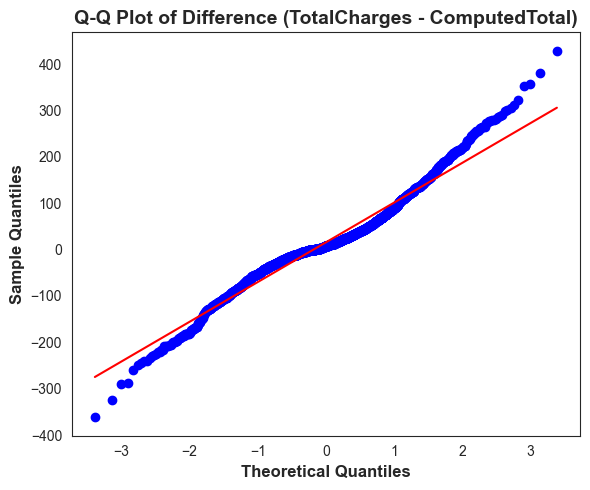

Use Wilcoxon Signed-Rank Test because the difference is not normally distributed
Wilcoxon Signed-Rank Test: W = 770164.0000, p = 0.0000

Mean Absolute Error (MAE): 61.6355
Relative MAE: 2.57%


In [54]:
import pandas as pd
from scipy.stats import shapiro, ttest_rel, wilcoxon
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import scipy.stats as stats

# Step 1: Create ComputedTotal and Drop Missing
df['ComputedTotal'] = df['MonthlyCharges'] * df['Tenure']
df_clean = df[['TotalCharges', 'ComputedTotal']].dropna()

# Step 2: Compute Difference
df_clean['Diff'] = df_clean['TotalCharges'] - df_clean['ComputedTotal']

# Step 3: Check Normality of the Difference
stat, p = shapiro(df_clean['Diff'])
print(f"Shapiro-Wilk Test on TotalCharges and ComputedTotal Difference: p-value = {p:.4f} → {'Normal' if p > 0.05 else 'Not Normal'}")

# Optional: Q-Q Plot
plt.figure(figsize=(6, 5))
stats.probplot(df_clean['Diff'], dist="norm", plot=plt)
plt.title("Q-Q Plot of Difference (TotalCharges - ComputedTotal)", fontsize=14, fontweight='bold')
plt.xlabel("Theoretical Quantiles", fontsize=12, fontweight='bold')
plt.ylabel("Sample Quantiles", fontsize=12, fontweight='bold')
plt.grid(False)
plt.tight_layout()
plt.show()

# Step 4: Choose and Apply Statistical Test
if p > 0.05:
    # Normal difference → use Paired t-test
    print("Use Paired t-test because the difference is normally distributed")
    t_stat, p_val = ttest_rel(df_clean['TotalCharges'], df_clean['ComputedTotal'])
    print(f"Paired t-test: t = {t_stat:.4f}, p = {p_val:.4f}")
else:
    # Non-normal difference → use Wilcoxon Signed-Rank Test
    print("Use Wilcoxon Signed-Rank Test because the difference is not normally distributed")
    w_stat, p_val = wilcoxon(df_clean['TotalCharges'], df_clean['ComputedTotal'])
    print(f"Wilcoxon Signed-Rank Test: W = {w_stat:.4f}, p = {p_val:.4f}")

# Step 5: Calculate MAE and Relative MAE
mae = mean_absolute_error(df_clean['TotalCharges'], df_clean['ComputedTotal'])
relative_mae = mae / df_clean['TotalCharges'].mean() * 100

print(f"\nMean Absolute Error (MAE): {mae:.4f}")
print(f"Relative MAE: {relative_mae:.2f}%")


### Interpretation: 
- `The statistical test showed the two values are not exactly equal—they differ and mae is not ≈ 0.00, but this is expected due to`
- Discounts
- Additional fees/charges not captured by monthly rate


---

# Statistical Test on Categorical Columns

## Chi-Square Test of Independence

This is the most **common type**. It tests whether two **categorical variables** are related or **independent** of each other

### 🧮 Formula:

$$
\chi^2 = \sum \frac{(O - E)^2}{E}
$$


Where:
- **O** = Observed frequency  
- **E** = Expected frequency under the assumption of independence

### ✅ When to Use Chi-Square Test:

- **Data Type**:  
  Should be frequencies or counts of cases — **not percentages** or means.  
  > *If your data is in percentages, convert it to raw counts first.*

- **Sample Size Rule**:  
  Expected frequency in each category should be **at least 5**.  
  > *This ensures the accuracy and validity of the test.*

### 🎯 Advantages:

- **Versatile**:  
  Works with more than two categories and variables.

- **Non-Parametric**:  
  No assumption of normal distribution, making it suitable for a wide range of categorical data.

### ⚠️ Limitations:

- **Sample Size Sensitivity**:  
  Not ideal for small samples. If expected values < 5, the test may be invalid.

- **Data Requirements**:  
  Requires **categorical data**. Not suitable for continuous variables unless binned into categories.

### 📌 Summary:
Use the Chi-Square test to evaluate the **relationship between two categorical variables** using count data. It’s a foundational tool for categorical data analysis in statistics and business intelligence.

In [55]:
import pandas as pd
from scipy.stats import chi2_contingency

table = pd.crosstab(df['Contract'], df['Churn'])
chi2, p, dof, expected = chi2_contingency(table)
print(f"Chi2: {chi2:.2f}, p-value: {p:.4f}, Degrees of Freedom: {dof}, \n\nExpected Frequencies:\n{np.round(expected, decimals=False)}, \n\nObserved Frequencies:\n{table}\n")
if p <= 0.05:
    print("Reject H₀: There is a significant association between Contract and Churn")
else:
    print("Failed to reject H₀: There is no significant association between Contract and Churn")

Chi2: 35.92, p-value: 0.0000, Degrees of Freedom: 2, 

Expected Frequencies:
[[748. 375.]
 [327. 163.]
 [258. 129.]], 

Observed Frequencies:
Churn            No  Yes
Contract                
Month-to-month  686  437
One year        365  125
Two year        282  105

Reject H₀: There is a significant association between Contract and Churn


---

### 📊 Interpretation

### ✅ Test Summary:
- **Chi-Square Statistic (χ²)**: 35.92  
- **p-value**: 0.0000  
- **Degrees of Freedom**: 2  

### 🧾 Observed Frequencies (Actual Counts):
| Contract Type      | Churn = No | Churn = Yes |
|--------------------|------------|-------------|
| Month-to-month     | 686        | 437         |
| One year           | 365        | 125         |
| Two year           | 282        | 105         |

### 📐 Expected Frequencies (Under Null Hypothesis):
| Contract Type      | Churn = No | Churn = Yes |
|--------------------|------------|-------------|
| Month-to-month     | 748        | 375         |
| One year           | 327        | 163         |
| Two year           | 258        | 129         |


### 📌 Interpretation:

- The **p-value = 0.0000** is **less than 0.05**, so we **reject the null hypothesis**.
- There is a **statistically significant association** between **Contract type** and **Churn**.
- The observed counts **deviate noticeably** from the expected counts, especially for the **Month-to-month** category.

### 📈 Business Insight:

> Customers with **Month-to-month contracts churn more than expected**, while those with **One-year and Two-year contracts churn less than expected**.  
> 
> This indicates that customers on shorter, more flexible plans are **more likely to leave**. Encouraging longer-term contracts may help reduce churn.

### 📎 Recommendation:

- **Incentivize One-year or Two-year contracts** with discounts or benefits.
- **Target Month-to-month customers** with loyalty programs or upgrade offers to reduce churn risk.


---

## Cramér’s V
- A measure of association strength between two categorical variables

- Ranges from 0 (no association) to 1 (perfect association)

- Based on the Chi-Square statistic and table size

### There are different type of Cramér’s V Formulla all are same

$$
V = \sqrt{ \frac{\chi^2}{n \cdot min(r - 1, c - 1)} }
$$

#### Where:
- **χ2** is the chi-square test statistic
- **n** is the total number of observations (sum of all frequencies in the contingency table)
- **r**  is the number of rows in the contingency table
- **c** is the number of columns in the contingency table


In [56]:
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency

# Step 1: Create contingency table
table = pd.crosstab(df['Contract'], df['Churn'])

# Step 2: Compute Cramér's V
chi2, p, dof, expected = chi2_contingency(table)
n = table.sum().sum()  # total observations
rows, cols = table.shape # get number of rows and columns
cramers_v = np.sqrt(chi2 / (n * (min(rows-1, cols-1))))

print(f"Cramér's V: {cramers_v:.3f}")


Cramér's V: 0.134


| Cramér’s V Value | Strength of Association |
| ---------------- | ----------------------- |
| 0.00–0.10        | Negligible              |
| 0.10–0.20        | Weak                    |
| 0.20–0.40        | Moderate                |
| 0.40–0.60        | Relatively strong       |
| 0.60–0.80        | Strong                  |
| 0.80–1.00        | Very strong             |


---

## Chi-Square Test and Cramér's V Analysis for Categorical Variables with Respect to Churn

In [57]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# Define columns
categorical_cols = ['Gender', 'SeniorCitizen', 'Partner', 'Dependents',
                    'PhoneService', 'MultipleLines', 'InternetService',
                    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                    'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
                    'PaymentMethod']
target_col = 'Churn'

# Interpret Cramér's V strength
def cramers_v_strength(v):
    if v < 0.10:
        return 'Negligible'
    elif v < 0.20:
        return 'Weak'
    elif v < 0.40:
        return 'Moderate'
    elif v < 0.60:
        return 'Relatively strong'
    elif v < 0.80:
        return 'Strong'
    else:
        return 'Very strong'

# Function to compute Chi-Square and Cramér's V
def chi_square_cramers_v(df, col, target):
    table = pd.crosstab(df[col], df[target])
    chi2, p, dof, expected = chi2_contingency(table)
    n = table.sum().sum()
    min_dim = min(table.shape) - 1
    cramers_v = np.sqrt(chi2 / (n * min_dim)) if min_dim > 0 else np.nan

    return {
        'Variable': col,
        'Target': target,
        'Chi2': round(chi2, 2),
        'p-value': round(p, 4),
        'Degrees of Freedom': dof,
        "Cramér's V": round(cramers_v, 3),
        "Association Strength": cramers_v_strength(cramers_v),
        "Hypothesis": "Reject H₀ (Significant)" if p < 0.05 else "Fail to Reject H₀ (Not significant)"
    }

# Run test for each categorical column
results = [chi_square_cramers_v(df, col, target_col) for col in categorical_cols]
results_df = pd.DataFrame(results)

# Print markdown output
print(results_df.to_markdown(index=False))


| Variable         | Target   |   Chi2 |   p-value |   Degrees of Freedom |   Cramér's V | Association Strength   | Hypothesis                          |
|:-----------------|:---------|-------:|----------:|---------------------:|-------------:|:-----------------------|:------------------------------------|
| Gender           | Churn    |   0    |    0.9497 |                    1 |        0.001 | Negligible             | Fail to Reject H₀ (Not significant) |
| SeniorCitizen    | Churn    |   0.01 |    0.9419 |                    1 |        0.002 | Negligible             | Fail to Reject H₀ (Not significant) |
| Partner          | Churn    |   0.14 |    0.7046 |                    1 |        0.008 | Negligible             | Fail to Reject H₀ (Not significant) |
| Dependents       | Churn    |   0.84 |    0.3592 |                    1 |        0.021 | Negligible             | Fail to Reject H₀ (Not significant) |
| PhoneService     | Churn    |   0.16 |    0.6894 |                    1 | 

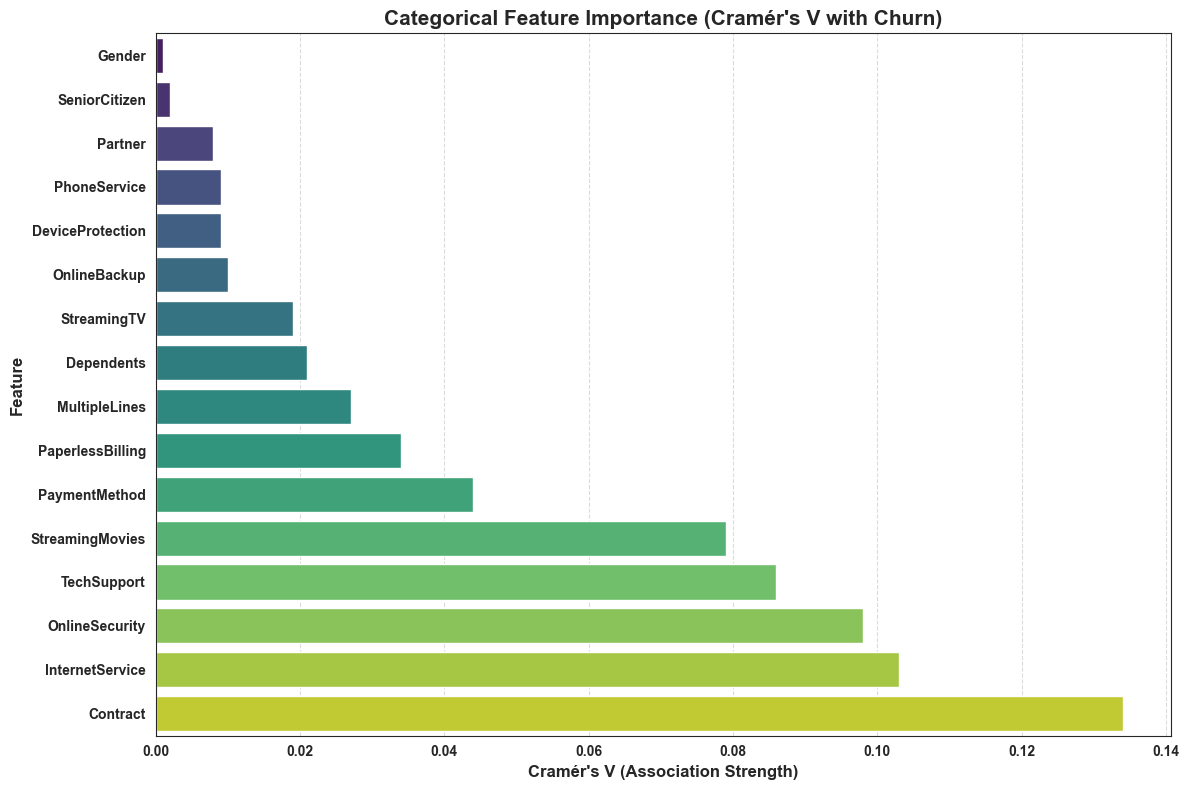

In [58]:
# Plotting Cramér's V Association Strength with Churn
plt.figure(figsize=(12, 8))
results_df_sorted = results_df.sort_values("Cramér's V")
# BarPlot
sns.barplot(data=results_df_sorted , x="Cramér's V", y="Variable", palette="viridis")
plt.title("Categorical Feature Importance (Cramér's V with Churn)", fontsize=15, fontweight='bold')
plt.xlabel("Cramér's V (Association Strength)", fontsize=12, fontweight='bold')
plt.ylabel("Feature", fontsize=12, fontweight='bold')
plt.xticks(fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Feature Engineering

In [59]:
# 1. AvgMonthlyCharge
df['AvgMonthlyCharge'] = (df['TotalCharges'] / df['Tenure'].replace(0, np.nan)).round(0)

# 2. IsMonthToMonth
df['IsMonthToMonth'] = df['Contract'].apply(lambda x: 1 if x == 'Month-to-month' else 0)

# 3. NumServicesUsed
internet_services = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
df['NumServicesUsed'] = df[internet_services].apply(lambda row: sum(service not in ['No', 'No internet service'] for service in row), axis=1)

# 6. Tenure in years
df['TenureYears'] = (df['Tenure'] / 12).round(2)

print("Feature engineering completed successfully")

Feature engineering completed successfully


# Correlation

In [60]:
# Calculate correlation matrix for numerical features
corr_matrix = df[['Tenure', 'MonthlyCharges', 'TotalCharges', 'AvgMonthlyCharge', 'NumServicesUsed', 'TenureYears']].corr()
corr_matrix = corr_matrix.round(2)
corr_matrix


,Tenure,MonthlyCharges,TotalCharges,AvgMonthlyCharge,NumServicesUsed,TenureYears
Tenure,1.00,0.00,0.77,0.00,0.00,1.00
MonthlyCharges,0.00,1.00,0.56,1.00,0.05,0.00
TotalCharges,0.77,0.56,1.00,0.56,0.03,0.77
AvgMonthlyCharge,0.00,1.00,0.56,1.00,0.05,0.00
NumServicesUsed,0.00,0.05,0.03,0.05,1.00,0.00
TenureYears,1.00,0.00,0.77,0.00,0.00,1.00


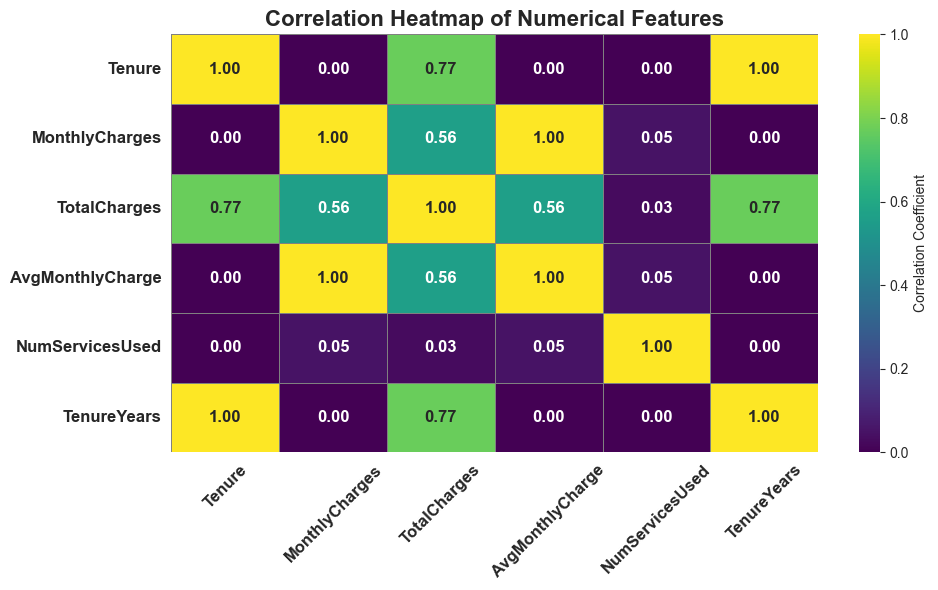

In [61]:
# heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="viridis",
    linewidths=0.5,
    linecolor='gray',
    cbar_kws={'label': 'Correlation Coefficient'},
    annot_kws={"size": 12, "weight": "bold"}
)
plt.title("Correlation Heatmap of Numerical Features", fontsize=16, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold', rotation=45)
plt.yticks(fontsize=12, fontweight='bold', rotation=0)
plt.tight_layout()
plt.show()

# Build Predictive Model

## Data Preprocessing

In [62]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Make a copy to avoid modifying original df
df_preprocessed = df.copy()

# Drop 'CustomerID' and 'ComputedTotal'
# Reason: 'CustomerID' is just an identifier (no predictive value), and 'ComputedTotal' is redundant since it's simply MonthlyCharges × Tenure, which is already captured by 'TotalCharges'.
df_preprocessed = df_preprocessed.drop(columns=['CustomerID', 'ComputedTotal'])

# Label encode all categorical columns
label_encoders = {}
for col in df_preprocessed.select_dtypes(include=['category']).columns:
    le = LabelEncoder()
    df_preprocessed[col] = le.fit_transform(df_preprocessed[col])
    label_encoders[col] = le

# Scale numeric features
numeric_features = ['MonthlyCharges', 'TotalCharges', 'AvgMonthlyCharge']
scaler = StandardScaler()
df_preprocessed[numeric_features] = scaler.fit_transform(df_preprocessed[numeric_features])

df_preprocessed.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,AvgMonthlyCharge,IsMonthToMonth,NumServicesUsed,TenureYears
0,1,0,0,0,30,1,2,2,0,0,0,0,0,0,0,0,0,0.131519,-0.191788,1,0.079694,1,0,2.50
1,0,0,0,1,11,1,2,1,1,1,0,1,0,1,0,1,2,-0.641907,-1.035539,1,-0.691717,1,0,0.92
2,0,1,0,0,17,0,0,1,0,2,0,0,2,0,2,0,2,-1.083865,-0.986851,0,-1.095789,0,2,1.42
3,0,0,1,0,26,1,0,2,0,0,0,0,0,0,1,1,0,0.499818,-0.129820,0,0.630702,0,0,2.17
4,1,0,1,1,23,1,0,1,1,0,0,2,0,2,0,1,3,0.168349,-0.399267,1,0.263363,1,2,1.92


## Feature Selection

### Why Use SHAP When Gradient Boosting Already Has .feature_importances_?
| ❓ What                   | 📌 Gradient Boosting `.feature_importances_`                | 🔥 SHAP                                      |
| ------------------------ | ----------------------------------------------------------- | -------------------------------------------- |
| **How it's calculated**  | Based on **average split gain** (Gini, entropy)             | Based on **Shapley values** from game theory |
| **Type**                 | **Global** importance only                                  | Gives **both global + local** explanations   |
| **Handles correlation?** | No — can overestimate importance if features are correlated | Yes — adjusts for feature interaction        |
| **Sign & Direction?**    | ❌ No sign (just importance score)                           | ✅ Positive/negative impact on prediction     |
| **Use for explanation**  | ❌ Limited interpretability                                  | ✅ Human-interpretable (visuals & values)     |


In [77]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import shap
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

def shap_feature_selection(df_preprocessed, target_col='Churn', top_k=17):
    # Split data
    X = df_preprocessed.drop(columns=[target_col])
    y = df_preprocessed[target_col]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train full model
    model = GradientBoostingClassifier(random_state=42)
    model.fit(X_train, y_train)

    # SHAP explainer and values
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X_train)

    # Feature importance via mean absolute SHAP
    shap_importance = pd.DataFrame({
        'Feature': X_train.columns,
        'Mean SHAP': np.abs(shap_values).mean(axis=0)
    }).sort_values(by='Mean SHAP', ascending=False)

    # Bar Plot of Mean SHAP Values
    plt.figure(figsize=(10, 6))
    sns.barplot(data=shap_importance.head(top_k), x='Mean SHAP', y='Feature', palette='viridis')
    plt.title(f'Top {top_k} Features by Mean SHAP Value')
    plt.xlabel("Mean SHAP Value (Impact on Model Output)")
    plt.ylabel("Feature")
    plt.tight_layout()
    plt.show()

    # Summary plot (dot-based)
    shap.summary_plot(shap_values, X_train)
    
    top_features = shap_importance['Feature'].head(top_k).tolist()

    # Train reduced model on top features
    model_reduced = GradientBoostingClassifier(random_state=42)
    model_reduced.fit(X_train[top_features], y_train)

    # Predictions
    y_pred = model_reduced.predict(X_test[top_features])
    y_prob = model_reduced.predict_proba(X_test[top_features])[:, 1]

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_prob)

    return {
        'Top Features': top_features,
        'SHAP Importances': shap_importance,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1 Score': f1,
        'ROC-AUC': roc,
        'Model': model_reduced
    }

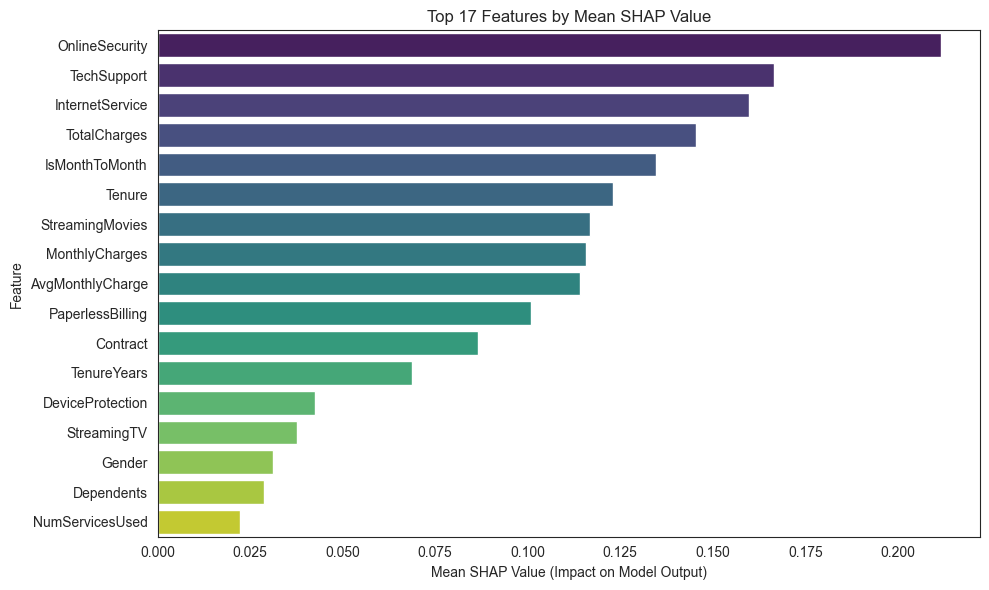

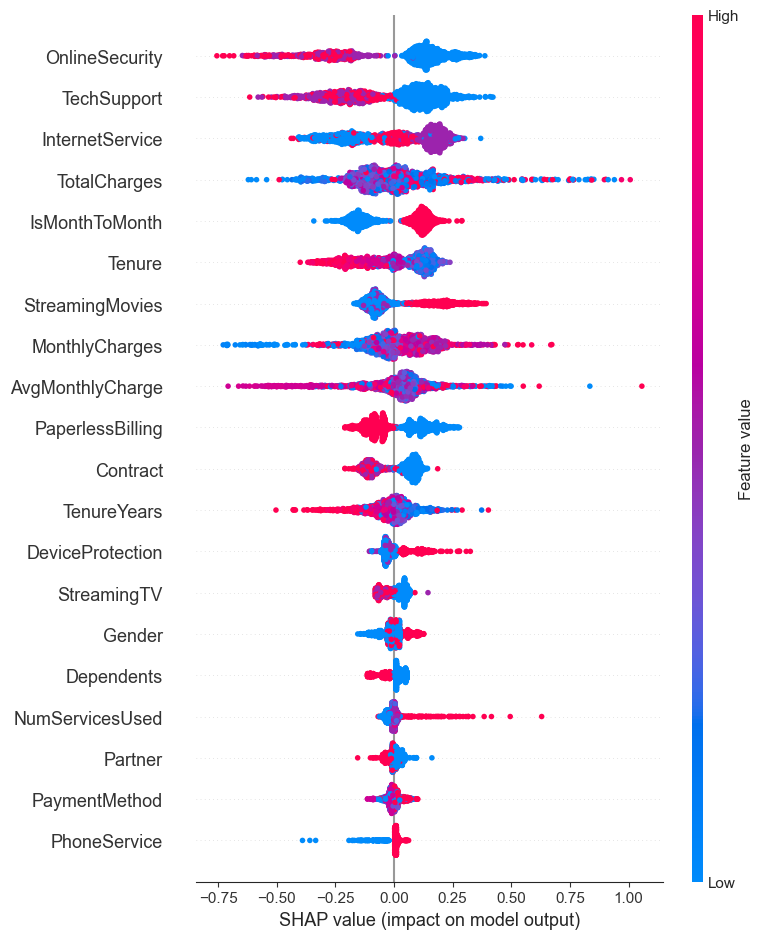

Accuracy: 0.6675
Precision: 0.48148148148148145
Recall: 0.1984732824427481
F1 Score: 0.2810810810810811
ROC-AUC: 0.6145747609183008


In [78]:
results = shap_feature_selection(df_preprocessed)

print("Accuracy:", results['Accuracy'])
print("Precision:", results['Precision'])
print("Recall:", results['Recall'])
print("F1 Score:", results['F1 Score'])
print("ROC-AUC:", results['ROC-AUC'])


### 📌 SHAP Summary Plot Interpretation (Dot-Based)

The SHAP Summary Plot helps you understand **which features are most important** and **how they affect the model’s predictions**.

### 🔢 What the Plot Shows

| Component        | Meaning                                                                 |
|------------------|-------------------------------------------------------------------------|
| **Y-axis (rows)**| Features, sorted by importance (top = most important)                   |
| **Dots**         | Each dot represents one row (customer/observation) in the dataset       |
| **Dot Color**    | Feature value: 🔴 Red = High, 🔵 Blue = Low                              |
| **X-axis**       | SHAP value: impact on the model’s output (positive or negative effect)  |

### 🟥🔵 Dot Color Meaning

- **Red Dots (🔴)** = Feature value is **high**
- **Blue Dots (🔵)** = Feature value is **low**

> Example:  
> For the `MonthlyCharges` feature:  
> 🔴 = high charges (e.g., $100)  
> 🔵 = low charges (e.g., $20)

### ⬅️➡️ Dot Position Meaning (SHAP Value)

- **Dots on the Right** (positive SHAP value): Feature **increases the prediction** (e.g., more likely to churn)
- **Dots on the Left** (negative SHAP value): Feature **decreases the prediction** (e.g., less likely to churn)

### 💡 Example

```
Feature: MonthlyCharges
    🔴🔴🔴🔴 →→→→→→→→   🔵🔵🔵 ←←←←←←
```

- Red dots (high MonthlyCharges) on the right: Increase chance of churn  
- Blue dots (low MonthlyCharges) on the left: Decrease chance of churn

✅ **Interpretation**: Customers who pay more monthly are more likely to churn.